In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import concrete_dropout, deep_ensemble

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('kin8nm')

In [3]:
deep_ensemble_model = deep_ensemble.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [100, 100, 100], learning_rate = 0.001, exp_decay = .995)

initial loss:  0.4499526619911194
final loss:  -4.147641658782959
initial loss:  0.37794896960258484
final loss:  -4.15427303314209
initial loss:  0.5391889810562134
final loss:  -4.009049415588379
initial loss:  0.3597905933856964
final loss:  -4.189932346343994
initial loss:  0.3536892831325531
final loss:  -4.1407999992370605


Deep ensemble test MAPE:  0.122294515
Deep ensemble test RMSE:  0.0839465
Deep ensemble test NLLK:  -3.9887574
Deep ensemble test CRPS:  tensor(0.0462)


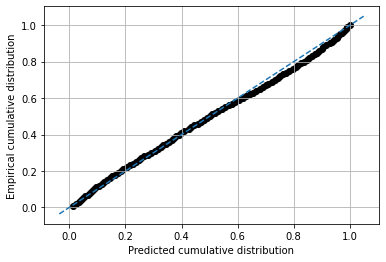

Deep ensemble test calibration error when step size is 0.001:  0.38695029777464146
Deep ensemble test calibration error when step size is 0.01:  0.03908236421001058
Deep ensemble test calibration error when step size is 0.1:  0.004163498203115571


In [4]:
mean_pred, var_pred = deep_ensemble_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('Deep ensemble test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Deep ensemble test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('Deep ensemble test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('Deep ensemble test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Deep ensemble test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Deep ensemble test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Deep ensemble test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

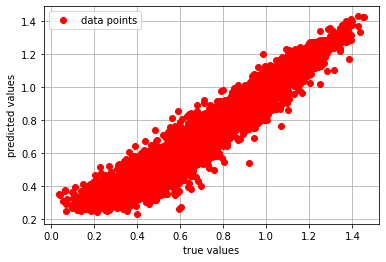

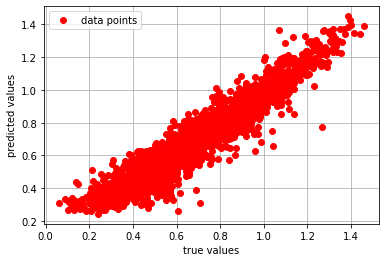

In [5]:
plt.plot(y_train.detach().numpy(), deep_ensemble_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

In [9]:
concrete_dropout_model = concrete_dropout.train_model(x_train, y_train, n_epoch = 200, n_features = 200, learning_rate = 0.001)

final loss:  -5.734463214874268


Concrete dropout test MAPE:  0.11162964
Concrete dropout test RMSE:  0.08333654
Concrete dropout test NLLK:  0.33247343
Concrete dropout test CRPS:  tensor(0.0518)


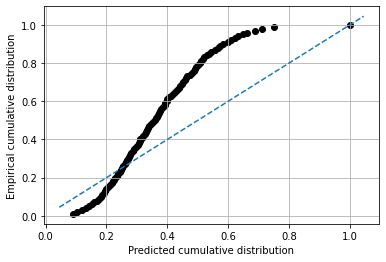

Concrete dropout test calibration error when step size is 0.001:  36.363673283271616
Concrete dropout test calibration error when step size is 0.01:  3.6187958223808088
Concrete dropout test calibration error when step size is 0.1:  0.32596141542578666


In [10]:
mean_pred, log_var_pred, _ = concrete_dropout_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = np.exp(log_var_pred.detach().numpy())
sd_pred = np.sqrt(var_pred)

print('Concrete dropout test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Concrete dropout test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('Concrete dropout test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('Concrete dropout test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Concrete dropout test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Concrete dropout test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Concrete dropout test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

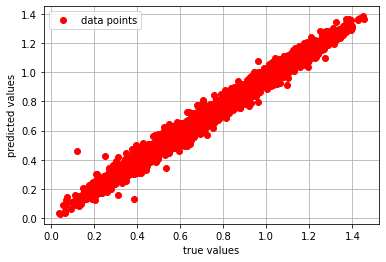

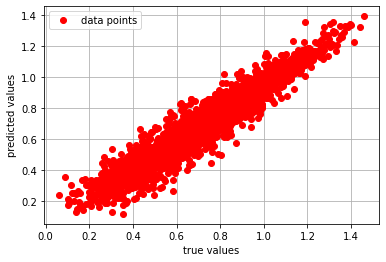

In [11]:
plt.plot(y_train.detach().numpy(), concrete_dropout_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()